In [2]:
import numpy as np
from matplotlib import pyplot as plt


In [39]:
H = np.array([1,0])
V = np.array([0,1])

rad = lambda degrees : degrees*np.pi/180
# halfwave = lambda theta : np.array([
#         [np.cos(theta)**2-np.sin(theta)**2,  2*np.cos(theta)*np.sin(theta)    ],
#         [2*np.cos(theta)*np.sin(theta),      np.sin(theta)**2-np.cos(theta)**2]
#     ])
rotation = lambda theta : np.array([
    [np.cos(theta),  np.sin(theta) ],
    [-np.sin(theta), np.cos(theta) ]
])

halfwave = lambda theta=0 : rotation(theta) @ (np.array([
    [1, 0 ],
    [0, -1]
]) @ np.linalg.inv(rotation(theta)))
# quarterwave = lambda theta : np.exp(-1j*np.pi/4)*np.array([
#     [np.cos(theta)**2+1j*np.sin(theta)**2, (1-1j)*np.sin(theta)*np.cos(theta)],
#     [(1-1j)*np.sin(theta)*np.cos(theta), np.sin(theta)**2+1j*np.cos(theta)**2]
# ])
quarterwave = lambda theta=0 : rotation(theta) @ (np.array([
    [1, 0],
    [0, 1j]
]) @ np.linalg.inv(rotation(theta)))

linearPolarizer  = lambda theta=0 : rotation(theta) @ (np.array([
    [1, 0],
    [0, 0]
]) @ np.linalg.inv(rotation(theta)))

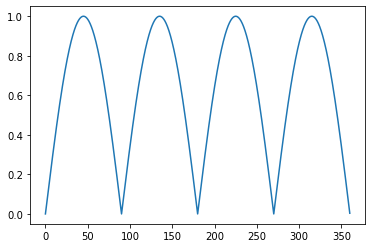

In [118]:
t=np.arange(0,360,0.1)
# a = [np.linalg.norm(linearPolarizer() @ np.array([np.cos(theta),np.sin(theta)])) for theta in t] # rotated incident
a = [
    linearPolarizer(theta=rad(90)) @ 
    (quarterwave(theta=rad(theta)) @
    (quarterwave(theta=rad(theta)) @
    (linearPolarizer() @ 
    (halfwave(theta=rad(45))
    @ V
    ))))
for theta in t]
a = [np.linalg.norm(b, 3) for b in a]
# print(np.argmax(a)/10)
plt.plot(t,a)
plt.show()
# plt.show()
# a